<a href="https://colab.research.google.com/github/MayankTech123/cv/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


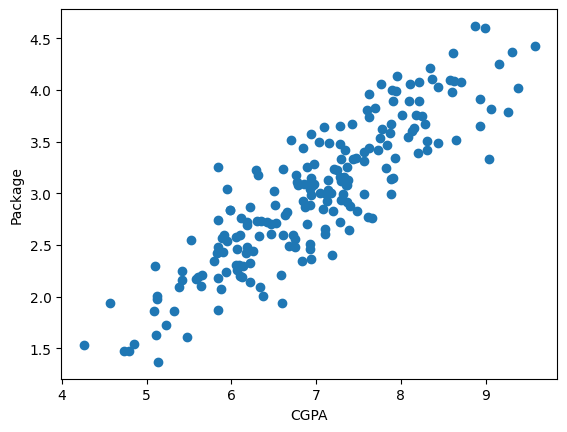

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [5]:
X=df.iloc[:,0:1]

In [9]:
y=df.iloc[:,-1]

In [10]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
X_train.shape

(160, 1)

In [16]:
X_test.shape

(40, 1)

In [27]:
X_test.iloc[0]

,112
cgpa,8.58


In [26]:
y_test.iloc[0]

4.1

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr=LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

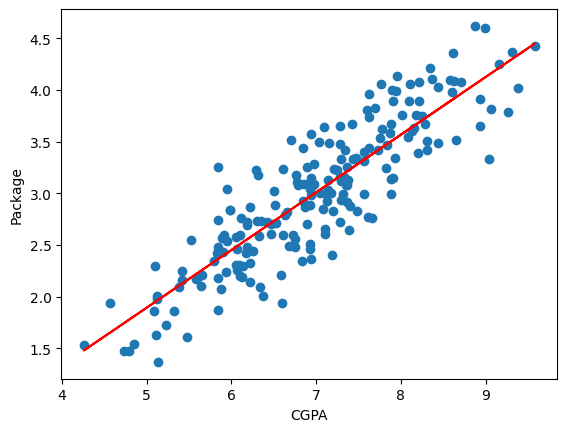

In [30]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [34]:
y_predict=lr.predict(X_test)

In [35]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [37]:
print('MSE',mean_squared_error(y_test,y_predict))

MSE 0.12129235313495527


In [38]:
print('MAE',mean_absolute_error(y_test,y_predict))

MAE 0.2884710931878175


In [40]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_predict)))

RMSE 0.34827051717731616


In [44]:
print('R2Score',r2_score(y_test,y_predict))

R2Score 0.780730147510384


In [45]:
X_test.shape

(40, 1)

In [47]:
1-((1-r2_score(y_test,y_predict))*(40-1))/(40-1-1)

0.7749598882343415

In [48]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

In [49]:
new_df1

,cgpa,package,random_feature
0,6.89,3.26,0.085100
1,5.12,1.98,0.822467
2,7.82,3.25,0.612573
3,7.42,3.67,0.977326
4,6.94,3.57,0.224152
...,...,...,...
195,6.93,2.46,0.764545
196,5.89,2.57,0.805602
197,7.21,3.24,0.982472
198,7.63,3.96,0.832106


In [54]:
new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.085100,3.26
1,5.12,0.822467,1.98
2,7.82,0.612573,3.25
3,7.42,0.977326,3.67
4,6.94,0.224152,3.57


#**Linear Regression From Skratch**

In [73]:
class Meralr:
  def __init__(self):
    self.m=None
    self.b=None

  def fit(self,X_train,y_train):
    num=0
    den=0
    for i in range(X_train.shape[0]):
        num=num+(X_train[i]-X_train.mean())*(y_train[i]-y_train.mean())
        den=den+(X_train[i]-X_train.mean())**2

    self.m=num/den
    self.b=y_train.mean()-(self.m*X_train.mean())
    print(self.m)
    print(self.b)

  def predict(self,X_test):
      return self.m*X_test+self.b

In [75]:
lr=Meralr()
lr.fit(X_train,y_train)
print(lr.predict(X_test.iloc[0]))

[0.55795197]
[-0.89611192]
cgpa    3.891116
Name: 112, dtype: float64
